http://ergast.com/mrd/db/#csv

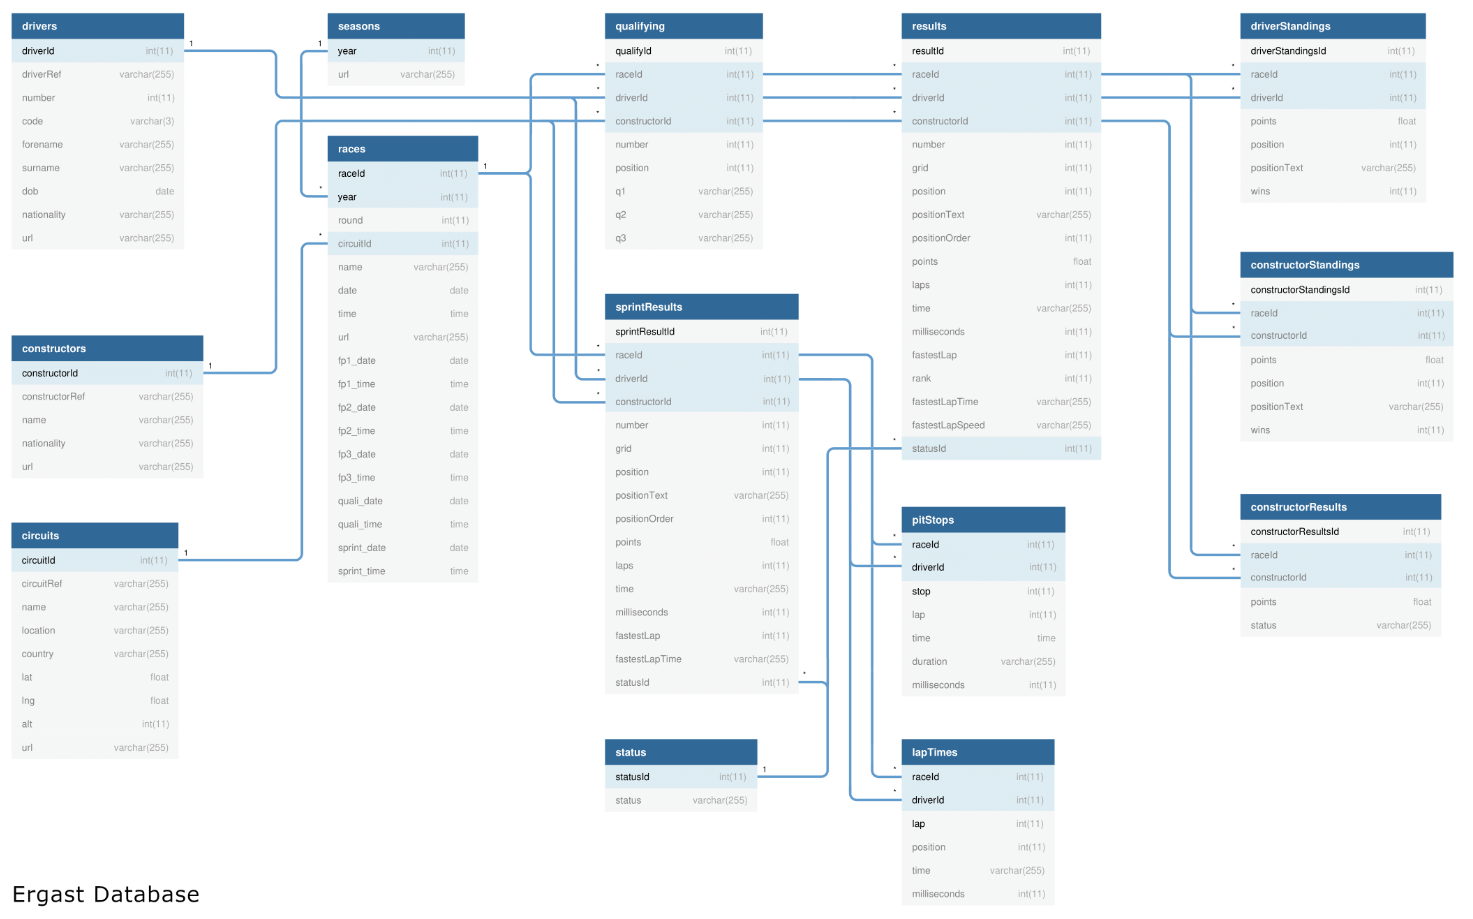

# 1) Import Libraries & Load Data

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [42]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(14,10), 'figure.dpi':100})

In [43]:
circuits = pd.read_csv('circuits.csv')
results = pd.read_csv('results.csv', escapechar='\\', encoding='utf-8')
seasons = pd.read_csv('seasons.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
driver_standings = pd.read_csv('driver_standings.csv')
constructors = pd.read_csv('constructors.csv')
constructors_results = pd.read_csv('constructor_results.csv')
constructors_standings = pd.read_csv('constructor_standings.csv')
status = pd.read_csv('status.csv')
qualifying = pd.read_csv('qualifying.csv')
sprint_results = pd.read_csv('sprint_results.csv')


# 2) Integrate Data

In [44]:
constructors.rename(columns = {'name':'constructors_name', 'nationality':'constructors_nationality', 'url':'constructors_url'}, inplace = True)
circuits.rename(columns = {'name':'circuits_name'}, inplace = True)
driver_standings.rename(columns = {'points':'driver_points', 'position':'driver_position', 'positionText':'driver_positionText', 'wins':'driver_wins'}, inplace = True)
qualifying.rename(columns = {'number':'qualy_number','position':'qualy_position'}, inplace = True)
sprint_results = sprint_results [["resultId","raceId","driverId","constructorId","number","position","points"]]
sprint_results.rename(columns = {'number':'sprint_number','position':'sprint_position','points':'sprint_points'}, inplace = True)
constructors_standings.rename(columns = {'points':'constructors_points', 'position':'constructors_position', 'positionText':'constructors_positionText', 'wins':'constructors_wins'}, inplace = True)
results = pd.merge(results, status, on='statusId', how='outer')
results = pd.merge(results, constructors, on='constructorId', how='outer')
races = pd.merge(races, circuits, on='circuitId', how='outer')
results['position'] = results['position'].str.replace('N','0') #DNF or 0

# 3) Create Main Table

In [45]:
driver_standings_tmp1 = pd.merge(drivers, driver_standings, on='driverId', how='left')
driver_standings_tmp1 = pd.merge(driver_standings_tmp1, qualifying, on=['driverId','raceId'], how='left')
driver_standings_tmp1 = pd.merge(driver_standings_tmp1, sprint_results, on=['driverId','raceId','constructorId'], how='left')
driver_standings_tmp2 = pd.merge(races, results,  on='raceId', how='outer')
driver_standings_full = pd.merge(driver_standings_tmp1, driver_standings_tmp2 , on=['driverId','raceId','constructorId'], how='outer')
driver_standings_full = pd.merge(driver_standings_full, constructors_standings , on=['constructorId','raceId'], how='outer')
driver_standings_full

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,url,driverStandingsId,...,status,constructorRef,constructors_name,constructors_nationality,constructors_url,constructorStandingsId,constructors_points,constructors_position,constructors_positionText,constructors_wins
0,1.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1.0,14.0,1.0,1,1.0
1,5.0,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,5.0,...,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1.0,14.0,1.0,1,1.0
2,1.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9.0,...,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,7.0,24.0,1.0,1,1.0
3,5.0,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,13.0,...,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,7.0,24.0,1.0,1,1.0
4,1.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27.0,...,+1 Lap,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18.0,28.0,3.0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26114.0,2.0,9.0,9,0.0
51782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26116.0,0.0,11.0,11,0.0
51783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26125.0,2.0,9.0,9,0.0
51784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26127.0,0.0,11.0,11,0.0


In [46]:
driver_standings_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51786 entries, 0 to 51785
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   driverId                   50867 non-null  float64
 1   driverRef                  34351 non-null  object 
 2   number_x                   34351 non-null  object 
 3   code                       34351 non-null  object 
 4   forename                   34351 non-null  object 
 5   surname                    34351 non-null  object 
 6   dob                        34351 non-null  object 
 7   nationality                34351 non-null  object 
 8   url                        34351 non-null  object 
 9   driverStandingsId          34344 non-null  float64
 10  raceId                     51776 non-null  float64
 11  driver_points              34344 non-null  float64
 12  driver_position            34344 non-null  float64
 13  driver_positionText        34344 non-null  obj

# 4) Filter Per Driver and Group by Season

In [47]:
vDriverCode = '"HAM"'

drivers = drivers.query(' code == '+vDriverCode+' ')
vDriverId  = str(drivers['driverId'].iloc[0])  #vDriverId  = str(drivers['driverId'].iloc[1]) #VER Driver code repeated
driver_year_full = driver_standings_full.query('driverId == '+vDriverId+' ')
driver_year_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 34528
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   driverId                   333 non-null    float64
 1   driverRef                  332 non-null    object 
 2   number_x                   332 non-null    object 
 3   code                       332 non-null    object 
 4   forename                   332 non-null    object 
 5   surname                    332 non-null    object 
 6   dob                        332 non-null    object 
 7   nationality                332 non-null    object 
 8   url                        332 non-null    object 
 9   driverStandingsId          332 non-null    float64
 10  raceId                     333 non-null    float64
 11  driver_points              332 non-null    float64
 12  driver_position            332 non-null    float64
 13  driver_positionText        332 non-null    objec

In [48]:
driver_year_show = driver_year_full [["driverId","driverRef","year","date","number_y","forename","surname","nationality","round","raceId","name","circuits_name","location","country",
                                                "driver_points","driver_position","position","status","constructors_name","constructors_points","constructors_position",
                                                "qualy_position","sprint_position","sprint_points","fastestLap","points"]]

driver_year_show = driver_year_show.dropna(subset=['driverRef','year'])
driver_year_show['year'] = driver_year_show['year'].astype(int)
driver_year_show['position'] = driver_year_show['position'].astype(int)
driver_year_show.sort_values(by=['year'], inplace=True, ascending=False)

driver_year_show.head(50)

,driverId,driverRef,year,date,number_y,forename,surname,nationality,round,raceId,...,position,status,constructors_name,constructors_points,constructors_position,qualy_position,sprint_position,sprint_points,fastestLap,points
663,1.0,hamilton,2023,2023-11-26,44,Lewis,Hamilton,British,22.0,1120.0,...,9,Finished,Mercedes,409.0,2.0,11.0,NaN,NaN,52,2.0
641,1.0,hamilton,2023,2023-07-23,44,Lewis,Hamilton,British,11.0,1109.0,...,4,Finished,Mercedes,223.0,2.0,1.0,NaN,NaN,54,12.0
621,1.0,hamilton,2023,2023-03-05,44,Lewis,Hamilton,British,1.0,1098.0,...,5,Finished,Mercedes,16.0,3.0,7.0,NaN,NaN,36,10.0
623,1.0,hamilton,2023,2023-03-19,44,Lewis,Hamilton,British,2.0,1099.0,...,5,Finished,Mercedes,38.0,3.0,8.0,NaN,NaN,47,10.0
625,1.0,hamilton,2023,2023-04-02,44,Lewis,Hamilton,British,3.0,1100.0,...,2,Finished,Mercedes,56.0,3.0,3.0,NaN,NaN,49,18.0
627,1.0,hamilton,2023,2023-04-30,44,Lewis,Hamilton,British,4.0,1101.0,...,6,Finished,Mercedes,76.0,3.0,5.0,7,2.0,48,8.0
629,1.0,hamilton,2023,2023-05-07,44,Lewis,Hamilton,British,5.0,1102.0,...,6,Finished,Mercedes,96.0,3.0,13.0,NaN,NaN,57,8.0
631,1.0,hamilton,2023,2023-05-28,44,Lewis,Hamilton,British,6.0,1104.0,...,4,Finished,Mercedes,119.0,3.0,6.0,NaN,NaN,33,13.0
635,1.0,hamilton,2023,2023-06-18,44,Lewis,Hamilton,British,8.0,1106.0,...,3,Finished,Mercedes,167.0,2.0,4.0,NaN,NaN,47,15.0
637,1.0,hamilton,2023,2023-07-02,44,Lewis,Hamilton,British,9.0,1107.0,...,8,Finished,Mercedes,178.0,2.0,5.0,10,0.0,49,4.0


In [49]:
def racePoints(row):
    if row['position'] == "1":
        return 25
    elif row['position'] == "2":
        return 18
    elif row['position'] == "3":
        return 15
    elif row['position'] == "4":
        return 12
    elif row['position'] == "5":
        return 10
    elif row['position'] == "6":
        return 8
    elif row['position'] == "7":
        return 6
    elif row['position'] == "8":
        return 4
    elif row['position'] == "9":
        return 2
    elif row['position'] == "10":
        return 1
    return 0

In [50]:
def sprintPOS(row):
    if row['sprint_position'] == 0:
        return "No sprint race"
    return row['sprint_position']

In [51]:
driver_year_show['race_points'] = driver_year_show.apply(lambda row: racePoints(row), axis=1)
driver_year_show['fastestLap'] = driver_year_show['points'] - driver_year_show['race_points']
driver_year_show['points'] = driver_year_show['points'] + driver_year_show['sprint_points']
driver_year_show['sprint_position'] = driver_year_show.apply(lambda row: sprintPOS(row), axis=1)
driver_year_show

,driverId,driverRef,year,date,number_y,forename,surname,nationality,round,raceId,...,status,constructors_name,constructors_points,constructors_position,qualy_position,sprint_position,sprint_points,fastestLap,points,race_points
663,1.0,hamilton,2023,2023-11-26,44,Lewis,Hamilton,British,22.0,1120.0,...,Finished,Mercedes,409.0,2.0,11.0,NaN,NaN,2.0,NaN,0
641,1.0,hamilton,2023,2023-07-23,44,Lewis,Hamilton,British,11.0,1109.0,...,Finished,Mercedes,223.0,2.0,1.0,NaN,NaN,12.0,NaN,0
621,1.0,hamilton,2023,2023-03-05,44,Lewis,Hamilton,British,1.0,1098.0,...,Finished,Mercedes,16.0,3.0,7.0,NaN,NaN,10.0,NaN,0
623,1.0,hamilton,2023,2023-03-19,44,Lewis,Hamilton,British,2.0,1099.0,...,Finished,Mercedes,38.0,3.0,8.0,NaN,NaN,10.0,NaN,0
625,1.0,hamilton,2023,2023-04-02,44,Lewis,Hamilton,British,3.0,1100.0,...,Finished,Mercedes,56.0,3.0,3.0,NaN,NaN,18.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,1.0,hamilton,2007,2007-06-10,2,Lewis,Hamilton,British,6.0,41.0,...,Finished,McLaren,88.0,11.0,1.0,NaN,NaN,10.0,NaN,0
46,1.0,hamilton,2007,2007-05-27,2,Lewis,Hamilton,British,5.0,40.0,...,Finished,McLaren,76.0,11.0,2.0,NaN,NaN,8.0,NaN,0
44,1.0,hamilton,2007,2007-05-13,2,Lewis,Hamilton,British,4.0,39.0,...,Finished,McLaren,58.0,11.0,4.0,NaN,NaN,8.0,NaN,0
42,1.0,hamilton,2007,2007-04-08,2,Lewis,Hamilton,British,2.0,37.0,...,Finished,McLaren,32.0,11.0,4.0,NaN,NaN,8.0,NaN,0


In [52]:
driver_grouped = driver_year_show.groupby(["driverRef","constructors_name","year"])["driver_points"].max().reset_index(name='Points').sort_values(by='year', ascending=False)

driver_grouped

,driverRef,constructors_name,year,Points
16,hamilton,Mercedes,2023,234.0
15,hamilton,Mercedes,2022,240.0
14,hamilton,Mercedes,2021,387.5
13,hamilton,Mercedes,2020,347.0
12,hamilton,Mercedes,2019,413.0
11,hamilton,Mercedes,2018,408.0
10,hamilton,Mercedes,2017,363.0
9,hamilton,Mercedes,2016,380.0
8,hamilton,Mercedes,2015,381.0
7,hamilton,Mercedes,2014,384.0


# 5) Python Visualizations

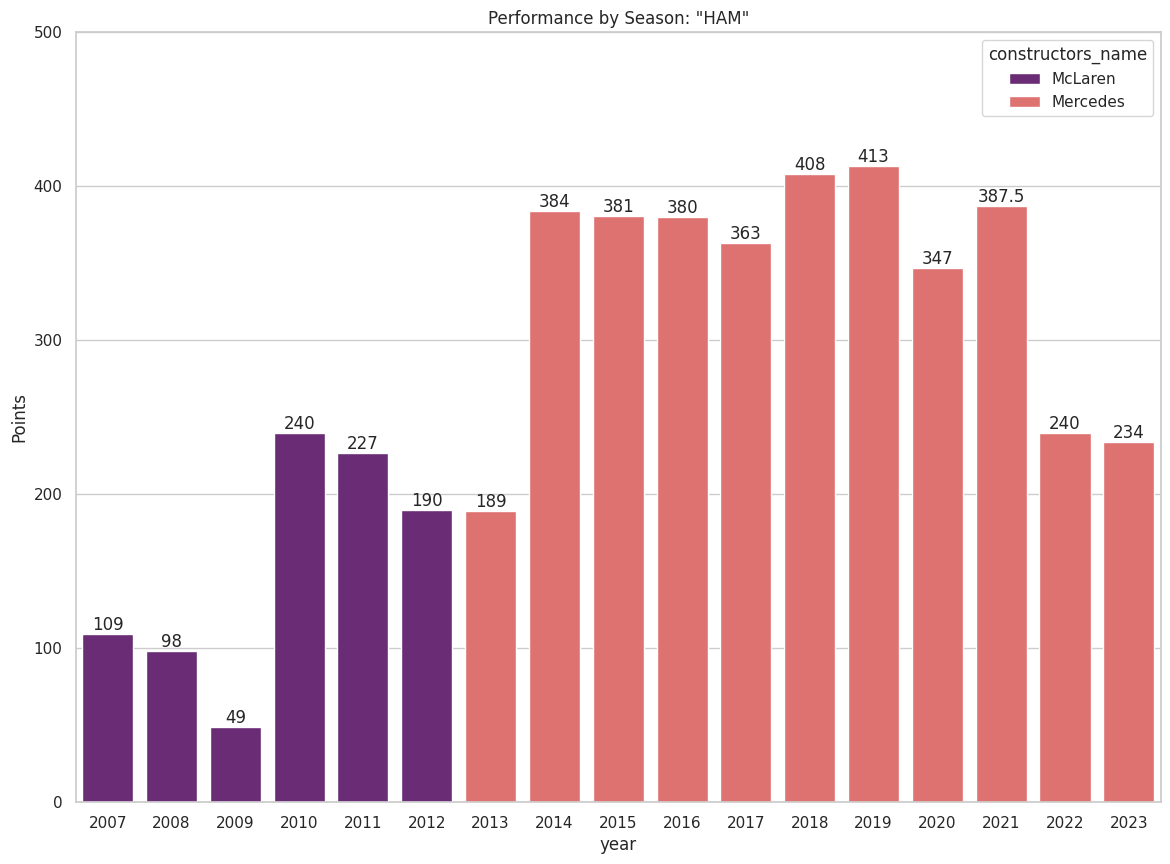

In [53]:
sns.set(style = 'whitegrid')
plt.ylim(0, 500)

graph = sns.barplot(x = 'year',
            y = 'Points',
            hue='constructors_name',
            data = driver_grouped,
            palette = "magma"
                    )

graph.set_title( "Performance by Season: " +vDriverCode)
for i in graph.containers:
    graph.bar_label(i,)

plt.show()

